# Part II - Prosper Loan Dataset Exploration
## by Tlotliso Molapo


## Investigation Overview

The goal of the presentation is to highlight the features that have a relationship with loan defaults and loan completions.


## Key Insights for Presentation

For the presentation I focused on the relationship between defaults and other features. The key features were the value of loans granted originally, the credit grades and Income categories. I analysed how the mean original loan amounts were higher for defaults than for completed loans no matter the category in income ranges and credit grade. 


## Dataset Overview

The dataset consists of loan data from Prosper. The datasets consists of 113,937 loans with 81 variables from loans approved by Prosper.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#saving csv to dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#creating Credit grade into a category datatype
CreditGrade_grades = ['AA','A','B','C','D','E','HR','NC']
C_grades = pd.api.types.CategoricalDtype(ordered=True, categories=CreditGrade_grades)
df['CreditGrade'] = df['CreditGrade'].astype(C_grades)
df.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], ordered=True)

In [4]:
#creating income ranges into a category datatype
IncomeRange_ranges = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed'
                      ]
Income_range = pd.api.types.CategoricalDtype(ordered=True, categories=IncomeRange_ranges)
df['IncomeRange'] = df['IncomeRange'].astype(Income_range)
#testing the datatype
df['IncomeRange'].dtype

CategoricalDtype(categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999',
                  '$50,000-74,999', '$100,000+', '$75,000-99,999',
                  'Not displayed'],
, ordered=True)

In [5]:
#querying database for customers who have defaulted
df_defaulted = df.query("LoanStatus == 'Defaulted' or LoanStatus == 'Completed'")

## Completed loans/Defaulted loans vs Income Ranges

When analysisng the data I observed that defaulted loans make up a small population of the loans in each income category. The income category assessed in $ were:

- Not employed
- Not displayed
- 0
- 1 - 24,999
- 25,000 -49,999
- 50,000 - 74,999
- 75,000 - 99,999
- +100,000

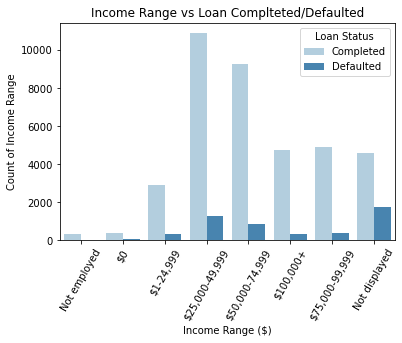

In [7]:
#inspecting the relationsip between the customers who have defaulted and their income range
income_plot = sb.countplot(data = df_defaulted, x='IncomeRange', hue='LoanStatus' ,palette = 'Blues')
plt.legend(title='Loan Status')
plt.xlabel('Income Range ($)')
plt.ylabel('Count of Income Range')
plt.title('Income Range vs Loan Complteted/Defaulted')
plt.xticks(rotation=60);

## Completed loans/Defaulted loans vs Credit Grade

When analysisng the data I observed that the proportion between defaults vs completed loans is lower in the best credit rating AA. The worst credit grade, HR had a high proportion of defaults vs completed loans.  With the second lowest being between C, D and E. 


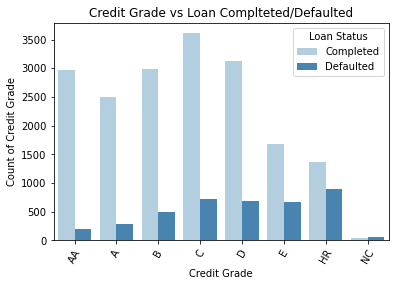

In [9]:
#inspecting the relationsip between the customers who have defaulted and their Credit Grade
income_plot = sb.countplot(data = df_defaulted, x='CreditGrade', hue='LoanStatus', palette = 'Blues')
plt.legend(title='Loan Status')
plt.xlabel('Credit Grade')
plt.ylabel('Count of Credit Grade')
plt.title('Credit Grade vs Loan Complteted/Defaulted')
plt.xticks(rotation=60);

## Home owner vs Loan completed/defaulted

Counter intuitively the ownership of a house does not factor in whether a borrower defaults or not. My observations were that the borrowers without house defaulted just about the same as those with houses.

This relationship was also observed with borrowers who completed their loans with borrowers with no houses have the same complted number of loans as borrowers with houses.

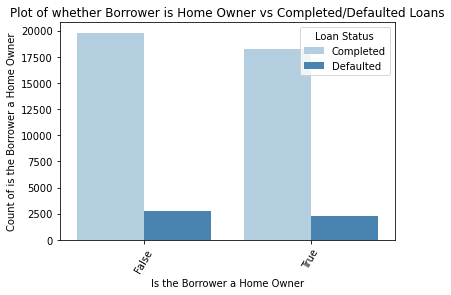

In [28]:
#inspecting the relationsip between the customers who have defaulted and their whether they own a Home
income_plot = sb.countplot(data = df_defaulted, x='IsBorrowerHomeowner', hue='LoanStatus' , palette = 'Blues')
plt.xticks(rotation=60)
plt.title('Plot of whether Borrower is Home Owner vs Completed/Defaulted Loans')
plt.legend(title='Loan Status')
plt.xlabel('Is the Borrower a Home Owner')
plt.ylabel('Count of is the Borrower a Home Owner');

## Original Loan Amount vs Income Range/ Credit Grade

An interesting observation was that in all income categories and credit grades; the borrowers who defaulted had higher mean original loan amounts than those who completed their loan payments.

For Income ranges +100,000: the mean loan amount for people who defaulted was about 12,000 and the mean loan amount for those who complteted was about 9000.

For credit rating AA the mean amount for loans who defaulted was 15,000, while the mean loan amount for borrowers who complted their loans was about 8000.

An interesting relationship exist in the credit rating, as higher reating have access to higher loan amounts, whilst higher loan amounts lead to defaults.



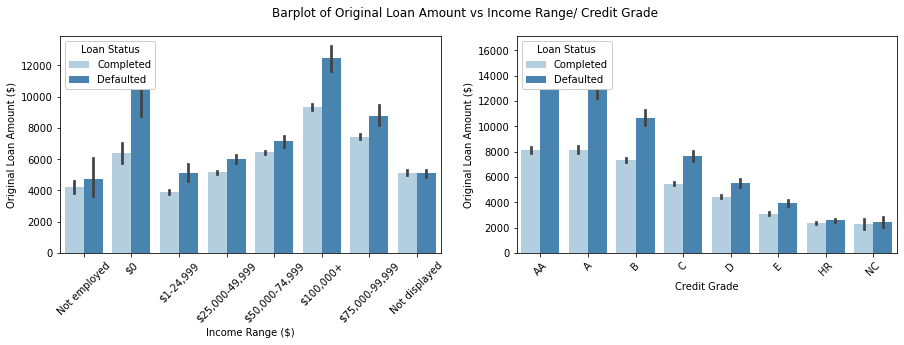

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,4))
fig.suptitle('Barplot of Original Loan Amount vs Income Range/ Credit Grade')


bar = sb.barplot(ax = axes[0], data = df_defaulted, x='IncomeRange',y='LoanOriginalAmount', hue='LoanStatus',palette='Blues')
bar.legend(loc=8, ncol=3, framealpha=1, title='Loan Status')
plt.xticks(rotation=60);

bar_2 = sb.barplot(ax= axes[1], data = df_defaulted, x='CreditGrade',y='LoanOriginalAmount', hue='LoanStatus', palette='Blues')
bar.legend(loc=8, ncol=3, framealpha=1, title='Loan Status')
bar.set(xlabel="Income Range ($)", ylabel ='Original Loan Amount ($)')
bar_2.set(xlabel="Credit Grade", ylabel ='Original Loan Amount ($)')
bar.legend(loc=2, ncol=1, framealpha=1, title='Loan Status')
bar_2.legend(loc=2, ncol=1, framealpha=1, title='Loan Status')

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt